In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [ ]:
# Create the autoencoder model and set the loss function and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data/', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ])),
    batch_size=batch_size, shuffle=True)


In [ ]:
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(data.size(0), -1)
        target=torch.tensor(target, dtype=torch.float32).view(data.size(0), -1)
        outputs = model(target)
        loss = criterion(outputs, data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (batch_idx+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')



<ipython-input-90-312f04e2ac83>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target=torch.tensor(target, dtype=torch.float32).view(data.size(0), -1)


Epoch [1/10], Step [100/938], Loss: 0.0640
Epoch [1/10], Step [200/938], Loss: 0.0619
Epoch [1/10], Step [300/938], Loss: 0.0648
Epoch [1/10], Step [400/938], Loss: 0.0603
Epoch [1/10], Step [500/938], Loss: 0.0586
Epoch [1/10], Step [600/938], Loss: 0.0590
Epoch [1/10], Step [700/938], Loss: 0.0575
Epoch [1/10], Step [800/938], Loss: 0.0572
Epoch [1/10], Step [900/938], Loss: 0.0579
Epoch [2/10], Step [100/938], Loss: 0.0555
Epoch [2/10], Step [200/938], Loss: 0.0535
Epoch [2/10], Step [300/938], Loss: 0.0577
Epoch [2/10], Step [400/938], Loss: 0.0536
Epoch [2/10], Step [500/938], Loss: 0.0574
Epoch [2/10], Step [600/938], Loss: 0.0553
Epoch [2/10], Step [700/938], Loss: 0.0523
Epoch [2/10], Step [800/938], Loss: 0.0549
Epoch [2/10], Step [900/938], Loss: 0.0544
Epoch [3/10], Step [100/938], Loss: 0.0531
Epoch [3/10], Step [200/938], Loss: 0.0593
Epoch [3/10], Step [300/938], Loss: 0.0543
Epoch [3/10], Step [400/938], Loss: 0.0528
Epoch [3/10], Step [500/938], Loss: 0.0545
Epoch [3/10

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt

# Create a function to create input tensors
def create_input(number):
    # Load MNIST dataset
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)

    # Get the image corresponding to the number
    index = dataset.targets == number
    image = dataset.data[index][0]

    # Create input tensor
    input_tensor = torch.tensor(image, dtype=torch.float32).view(1, -1)
    input_tensor = input_tensor.unsqueeze(0) # add a dimension to the tensor to match the input shape of the model
    return input_tensor, torch.tensor([number], dtype=torch.float32)

torch.Size([1])


<ipython-input-91-096d4bcce533>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(image, dtype=torch.float32).view(1, -1)


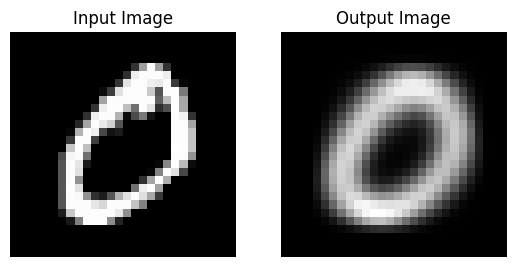

In [ ]:
# Test the model on a specific number
input_tensor, target = create_input(0)
print(target.shape)
output_tensor = model(target).squeeze() # use the squeeze function to remove the extra dimension of the output tensor

# Convert the output tensor to a numpy array and reshape it to an image format
output_image = output_tensor.detach().numpy().reshape((28,28))

# Plot the input and output images
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(input_tensor.view(28, 28), cmap='gray')
ax[0].set_title('Input Image')
ax[0].axis('off')
ax[1].imshow(output_image, cmap='gray')
ax[1].set_title('Output Image')
ax[1].axis('off')
plt.show()